# **Data Preparation, Model Building, and Performance Evaluation**

In this practice, let's see how to fit the polynomial regression.

## Step 1: Import Required Libraries
- First, import the required libraries.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Now, read the dataset __position_salaries.csv__.


In [48]:
# data = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv') 
data = pd.read_csv('../../Datasets/position_salaries.csv') 
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


- The following command provides details about the dataset that was imported.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [8]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


__Observation:__
- There are no null objects.

## Step 2: Fit the Linear Regression Model

- Now, let's define the features and the target variables.
- Here, X is assigned to all the rows in the second column of the dataset.

- y is assigned to all the rows of the third column of the same dataset.

In [9]:
X=data.iloc[:,1:2].values
y=data.iloc[:,2].values

- Once the dependent and independent variables are defined, let's move forward with fitting the data.

- Import __train_test_split__ from the sklearn library.

- Use the train_test_split function to split the data into an 80:20 ratio.  

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

- First, let us see if linear regression works on this data. 
- From **sklearn.linear_model**, import the linear regression function.
- Assign **LinearRegression()** to the variable **lin_reg**.
- Next, fit the data using the defined variables X and y.

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

__Observation:__

- We have fit the linear regression model to the given dataset.

- Next, let us visualize the fitted data using a scatter plot.
- Let us define a function **viz_linear** to plot the X and y values in red, while the fitted line uses a blue color.
- Provide the appropriate X and y axis labels, along with a suitable title for the plot.

In [12]:
def viz_linear():
  plt.scatter(X,y, color = 'red')
  plt.plot(X,lin_reg.predict(X), color = 'blue')
  plt.title('Linear Regression Model')
  plt.xlabel('Position Level')
  plt.ylabel('Salary')
  plt.show()
  return

- Run the function to get the plot

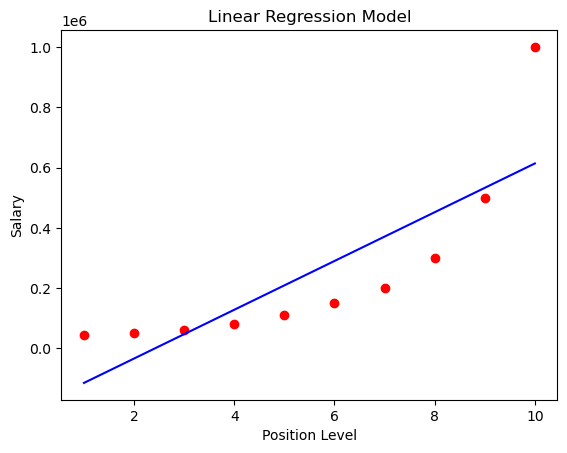

In [13]:
viz_linear()

__Observation:__
- In the above figure, you can see that even though we have fit the line, the data points are scattered and do not fit the line correctly. 

## Step 3: Fit the Polynomial Regression Model

- Let's try polynomial regression and see what happens.
- First, import the relevant libraries.
- Next, assign the **PolynomialFeatures** of degree 4 to the variable **poly_reg**.
- Fit the values of X and assign them to the variable **X_poly**.
- Finally, get the linear regression function and assign it to the variable **pol_reg**.

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4) # the power of 4 polynomial.
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()

- Let's fit the linear model using X_poly as a feature and y as the target variable.

In [15]:
#train the polynomial regression model
pol_reg.fit(X_poly, y)

LinearRegression()

__Observation:__
- We have fitted the polynomial regression to the given data.

- Let's create a different function for the polynomial regression.
- Polynomial regression is used when the data points do not fit the linear model.

In [16]:
def viz_polynomial():
  plt.scatter(X, y, color = 'red')
  plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
  plt.title('Linear regression with polynomial with degree 4')
  plt.xlabel('Position level')
  plt.ylabel('Salary')
  plt.show()
  return

- Now, call the function to get the scatter plot with the blue line showing how the fitted line covers the given data points.

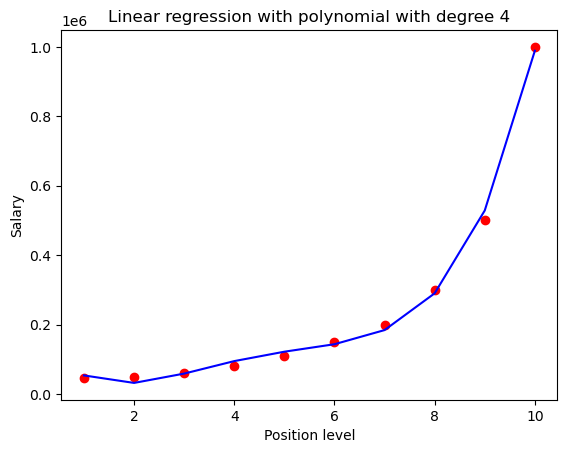

In [17]:
viz_polynomial()

In [18]:
pol_reg.coef_

array([      0.        , -211002.33100292,   94765.44289063,
        -15463.28671331,     890.15151515])

__Observation:__

- As you can see, the regression line is able to fit the majority of the data points.

- Now, let's try to predict one value using the predict function.

In [19]:
lin_reg.predict([[5.5]])

array([249500.])

__Observation:__
- If you had used the linear regression model, the output would have been 249500.

In [20]:
pol_reg.predict(poly_reg.fit_transform([[5.5]]))

array([132148.43750003])

__Observations:__
- From the above two outputs, it is clear that there is a difference between the two predictions.

- Hence, we can infer that non-linear inputs require non-linear models, such as the polynomial model. 

##__Ridge Regression__
In this demo, let's see how to implement ridge regression, also called regularization.

## Step 4: Import the Required Libraries and Perform Basic EDA 
- First, import the libraries.

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score 

- Import the data set **housing.csv** and read it.
- Show the first 5 rows of the dataset.

In [22]:
df= pd.read_csv('../../Datasets/housing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


__Observations:__

- This is the head of the data.
- The column **MEDV** is the target variable.

- Let's get the information about the data.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1    ZN       506 non-null    float64
 2    INDUS    506 non-null    float64
 3    CHAS     506 non-null    int64  
 4    NOX      506 non-null    float64
 5    RM       506 non-null    float64
 6    AGE      506 non-null    float64
 7    DIS      506 non-null    float64
 8    RAD      506 non-null    int64  
 9    TAX      506 non-null    float64
 10   PTRATIO  506 non-null    float64
 11   B        506 non-null    float64
 12   LSTAT    506 non-null    float64
 13  MEDV      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## Step 5: Fit the Ridge Model for the Given Data and Find the Alpha Value

- Now, let us define the dependent and independent variables.

In [24]:
X = df.drop(['MEDV'], axis = 1)
y = df['MEDV']

- Let us split the data using **train_test_split**.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

- Let's fit the model and check what the intercept value is.

In [26]:
# We choose a random alpha value of 1 as hyperparameter
Ridge_model = Ridge(alpha=1).fit(X_train, y_train)
Ridge_model.intercept_

24.878370472969355

__Observation:__
- The intercept value for the Ridge model is 24.8.

- The following code calculates the root mean squared error (RMSE) of the testing data:

In [27]:
y_pred = Ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4.741357980709098

__Observation:__
- The RMSE value is 4.74. This tell us how far our model is.

- Let's check the coefficient of the model and the R2 score.

In [28]:
Ridge_model.coef_

array([-0.12383039,  0.03139178,  0.01767668,  2.54277179, -8.77249222,
        4.37980204, -0.01537349, -1.29086084,  0.24406848, -0.01082435,
       -0.83346553,  0.01348642, -0.53435396])

In [29]:
r2_score(y_test, y_pred)

0.6789748327846081

__Observations:__
- The given model is a moderate fit for the given data.

In [30]:
from sklearn.model_selection import GridSearchCV


grid = dict()
grid['alpha'] = np.arange(0,1,0.1)

#estimator:
model = Ridge()
# cv = cross-validation
cv = RepeatedKFold(n_splits =10, n_repeats =3, random_state =1)
search = GridSearchCV(model, grid, scoring = 'neg_mean_absolute_error',cv = cv, n_jobs= -1)

#training
results = search.fit(X_train, y_train)

print('Negative MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Negative MAE: -3.500
Config: {'alpha': 0.7000000000000001}


__Observation:__

- As you can see from the output, the score is **-3.5**, and the configuration fusion alpha is **0.7**.

- Let's fit this with alpha points and try to predict.

In [31]:
# Fit the model again using the obtained alpha hyperparameter
Ridge_model = Ridge (alpha = 0.7).fit(X_train, y_train)
y_pred = Ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4.731437210393683

In [32]:
r2_score(y_test,y_pred)

0.6803168470441051

__Observation:__
- The r2 score is 0.68, which means it is a moderate fit for the given data.

- Let's check the coefficient of the ridge regression.

In [33]:
pd.Series(Ridge_model.coef_, index = X_train.columns)

CRIM        -0.124643
 ZN          0.031027
 INDUS       0.023550
 CHAS        2.595725
 NOX       -10.178221
 RM          4.382223
 AGE        -0.014263
 DIS        -1.311503
 RAD         0.246439
 TAX        -0.010654
 PTRATIO    -0.850029
 B           0.013431
 LSTAT      -0.530846
dtype: float64

__Observation:__

- A lot of penalization has occurred, as you can see in the negative values as well.

## __Data Preparation, Model Building, and Performance Evaluation__
In this section, let's understand lasso regression and its benefits.

*   Lasso regression is used in the selection of features and the removal of automated variables.
*   Typically, this approach is used in machine learning to choose the subset of variables.
* The coefficients in a lasso regression are zero.

# Step 6: Import Required Libraries


*   Import package NumPy as np
*   Import package pandas as pd
*   Import package sklearn
*   Import package matplotlib as plt

In [34]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LassoCV 
import matplotlib.pyplot as plt

# Step 7: Load the Datasets
- We will now read the **Hitters.csv** dataset.
- Let us now check the head of the data.

In [35]:
df = pd.read_csv('../../Datasets/Hitters.csv')
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


**Observation**

- The above output shows the head of the data.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      263 non-null    f

**Observations**
- Overall, it includes 322 observations and 22 columns.
- Notice that there are missing values in **Salary**.

# Step 8: Replace the Missing Values with Median
- As seen, the **Salary** field has null values. 
- Let's now use the median to replace the null values.

In [37]:
df['Salary'].fillna(df['Salary'].median(skipna=True), inplace=True)
df.isna().sum()

Unnamed: 0    0
AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary        0
NewLeague     0
dtype: int64

**Observation**
- As shown, it is quite clear from the output that the missing values have been replaced.

# Step 9: Prepare Data for a Categorical Model
- Create a dummy variable.
- Convert Division and NewLeague into dummy variables.

In [38]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']], drop_first=True)
y = df['Salary']
x_ = df.drop(['Unnamed: 0', 'Salary', 'League', 'Division', 'NewLeague'], axis =1).astype('float64')
X = pd.concat([x_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis =1)

#Step 10: Create X and y Variables
- Create the X and y variables
- Split the data into train and test sets

In [39]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 11: Create a Lasso Model


In [40]:
lasso_model = Lasso(alpha=0.1, max_iter=10000).fit(X_train, y_train)
lasso_model.intercept_

344.30918467296095

**Observation**
- The intercept value is 344.

Let's find the coefficient.

In [41]:
lasso_model.coef_

array([-1.98439668e+00,  5.56849914e+00,  5.00701289e+00,  1.74309707e-02,
       -9.09231728e-01,  4.92197476e+00, -1.04678426e+01, -2.12559027e-01,
        5.92112606e-01, -3.33567774e-02,  8.81493466e-01,  7.97201288e-01,
       -8.20349678e-01,  1.83389792e-01,  4.01248147e-01, -4.23236791e+00,
        4.72290199e+01, -1.14971233e+02, -1.94095641e+01])

**Observation**
- In lasso regression, the attribute will be used, and it is evident that the last attribute, NewLeague, has been penalized to zero.

# Step 12: Test the Lasso Model and Make Predictions
- Let's try to optimize. 
- Before that, check RMSE and R2 scores.

In [42]:
y_pred = lasso_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

345.5314541912184

**Observation**
- RMSE is 345.61.

In [43]:
r2_score(y_test, y_pred)

0.3660728265476788

**Observation**
- r2 score is 0.36.

Now, try to optimize using cross-validation.

In [44]:
lasso_cv_model = LassoCV(alphas = np.random.randint(0, 1000, 100), cv =10, max_iter=10000, n_jobs=-1).fit(X_train, y_train)

Let's check the best alpha value.

In [45]:
lasso_cv_model.alpha_

108

**Observation**
- As you can see here, 13 is the best alpha value that we got from cross-validation.

Let's use the best alpha value, and see if we can tune it.

In [46]:
lasso_tuned = Lasso(alpha=0.1, max_iter=10000).fit(X_train, y_train)
y_pred_tuned = lasso_tuned.predict(x_test) 
np.sqrt(mean_squared_error(y_test, y_pred_tuned))

345.5314541912184

**Observations**
- As you can see above, RMSEs are more. 
- It has increased by 1%.

Now, let's find the coefficient of the tuned model.

In [47]:
pd.Series(lasso_tuned.coef_, index=X_train.columns)

AtBat           -1.984397
Hits             5.568499
HmRun            5.007013
Runs             0.017431
RBI             -0.909232
Walks            4.921975
Years          -10.467843
CAtBat          -0.212559
CHits            0.592113
CHmRun          -0.033357
CRuns            0.881493
CRBI             0.797201
CWalks          -0.820350
PutOuts          0.183390
Assists          0.401248
Errors          -4.232368
League_N        47.229020
Division_W    -114.971233
NewLeague_N    -19.409564
dtype: float64

**Observations**
- As compared with the normal lasso, you can see that it has penalized the other group attributes like League and RBI.
- This is how the lasso regression will penalize.